# 1. NetCDF with Python

NetCDF files consist of metadata, or "attributes" in netCDF parlance, dimensions, and variables. Variables can be thought of as functions of the dimensions present in variables. In the case of PRMS parameters, there are parameters that are functions of spatial dimensions only, or functions of time. Here is a simple example to show the general structure of netCDF files.

In [1]:
import netCDF4
import os

try:
    ds.close()
except:
    pass

if os.path.exists('new.nc'):
    os.remove('new.nc')

ds = netCDF4.Dataset('new.nc', 'w')

ds.setncattr('title', 'my new shiny dataset')

ds.createDimension('time')
t = ds.createVariable('time', 'i8', dimensions=('time',))

at = ds.createVariable('atmospheric_temperature', 'f4', ('time', ))

Next we set the units of the time variable. This will allow another library, `xarray`, to impute the time dimension for us and make plotting very nice, as we'll show. In the cell below, we'll add time units, add some fake atmospheric temperature data, and then plot atmospheric temperature as a function of time.

In [2]:
import numpy as np

t.setncattr('units', 'days since 1990-01-01 00:00:00')

at[:] = np.array([34.0, 50.2, 42.3, 40.0, 29.2, 31.1])
t[:] = range(len(at))

print ds
print ds['time'][:]
print ds['atmospheric_temperature'][:]
ds.close()

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: my new shiny dataset
    dimensions(sizes): time(6)
    variables(dimensions): int64 time(time), float32 atmospheric_temperature(time)
    groups: 

[0 1 2 3 4 5]
[ 34.          50.20000076  42.29999924  40.          29.20000076
  31.10000038]


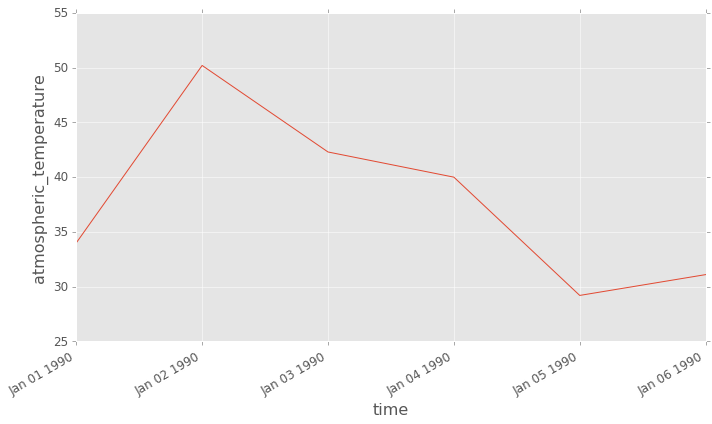

In [3]:
%matplotlib inline
from util.capstone import config_plots
config_plots()
from xarray import open_dataset

ds = open_dataset('new.nc')
ds.atmospheric_temperature.plot()